In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

DATASET_PATH = "Truth_Seeker_Model_Dataset.csv"
df = pd.read_csv(DATASET_PATH)

print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df = df.sample(frac=1)
df

Number of training sentences: 134,198



,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
60376,60376,W. Gardner,"""The majority of Austinites rent"" the places t...",True,1.0,"austinites, rent",Hello Austinites! I am looking for someone to ...,Mostly Agree,Agree
40041,40041,Louis Jacobson,"""There are more words in the IRS code than the...",True,1.0,"More words, IRS code, Bible","""There are more words in the IRS code than the...",Agree,Agree
67935,67935,Katie Sanders,"The Keystone pipeline creates ""35 permanent jo...",True,1.0,"keystone pipeline, 35 jobs",@HouseGOP @RepMTG Garbage lies. 35 permanent j...,Mostly Agree,Agree
49984,49984,Bill McCarthy,The mRNA COVID-19 vaccines are really gene the...,False,0.0,"vaccine,gene therapy,mRNA",@WolfieSmiff another unreported vaccine injury...,Mostly Agree,Agree
116772,116772,Miriam Valverde,Says Joe Biden and Kamala Harris support abort...,False,0.0,"Biden, Harris, support abortion",@JoeBiden @KamalaHarris How sad this would be ...,Agree,Agree
...,...,...,...,...,...,...,...,...,...
65566,65566,Jon Greenberg,"""The majority support (raising) the minimum wa...",True,1.0,"majority, support, minimum wage","@POTUS Yeah, but a majority support universal ...",Agree,Agree
99271,99271,Tom Kertscher,Says Donald Trump offered his hotel to our tro...,False,0.0,"Trump, offered, hotel, troops",@unscriptedmike If Trump really cared that muc...,Agree,Agree
48764,48764,Tom Kertscher,"""The top 1% pays 90% of income taxes.",False,0.0,"top 1%, 90% income tax",This is your daily reminder that the Top 1% of...,Mostly Agree,Agree
108392,108392,Daniel Funke,"A judge has ordered a ""HAND RECOUNT by an INDE...",False,0.0,"judge, recount, Michigan",@OfficialKYChick @HannahDrake628 @politico i h...,Agree,Agree


In [2]:
def split_dataframe(df, statement_column='statement', test_size=0.2, random_state=None):
    # Step 1: Get unique statements
    unique_statements = df[statement_column].drop_duplicates()
    
    # Step 2: Perform an 80/20 split on the unique statements
    train_statements, test_statements = train_test_split(
        unique_statements, test_size=test_size, random_state=random_state
    )
    
    # Step 3: Filter the original dataframe using the split statements
    train_df = df[df[statement_column].isin(train_statements)].reset_index(drop=True)
    test_df = df[df[statement_column].isin(test_statements)].reset_index(drop=True)
    
    return train_df, test_df

In [3]:
df = df.drop(df[df['5_label_majority_answer'] == 'NO MAJORITY'].index, axis=0)
#df = df.drop(df[df['3_label_majority_answer'] == 'NO MAJORITY'].index, axis=0)

#df = df.drop('5_label_majority_answer', axis=1)
df = df.drop('3_label_majority_answer', axis=1)

train,test = split_dataframe(df, random_state=42)


#labels = df["BinaryNumTarget"].values
df.shape

(111593, 8)

In [4]:
#sentences = 'Statement: ' + df['statement'] + '| Tweet: ' +df['tweet']
#sentences = df['target'].astype(str) + 'Statement: ' + df['statement'] + '| Tweet: ' + df['tweet']
sentences = train['target'].astype(str) + ' Statement: ' + train['statement'] + '| Tweet: ' + train['tweet']
sentences_test = test['target'].astype(str) + ' Statement: ' + test['statement'] + '| Tweet: ' + test['tweet']

In [5]:
sentences[0]

'True Statement: "The majority of Austinites rent" the places they live.| Tweet: Hello Austinites! I am looking for someone to go on camera for a story. Anyone unable to afford Austin\'s rising rent prices and thinking about moving out of town/state? @SpectrumNews1TX #austin \n\nIf you\'re interested in being interviewed, email me at jamil.donith@charter.com'

In [6]:
sentences_test[0]

'True Statement: The Keystone pipeline creates "35 permanent jobs" after construction, according to a government report.| Tweet: @HouseGOP @RepMTG Garbage lies. 35 permanent jobs from the Keystone Pipeline lol. 35.'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111593 entries, 60376 to 34207
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               111593 non-null  int64  
 1   author                   111593 non-null  object 
 2   statement                111593 non-null  object 
 3   target                   111593 non-null  bool   
 4   BinaryNumTarget          111593 non-null  float64
 5   manual_keywords          111593 non-null  object 
 6   tweet                    111593 non-null  object 
 7   5_label_majority_answer  111593 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [8]:
def generate_truthfulness_4way(row):
    if row['target'] == True:
        if row['5_label_majority_answer'] == 'Agree':
            return 'True'
        elif row['5_label_majority_answer'] == 'Disagree':
            return 'False'
        elif row['5_label_majority_answer'] == 'Mostly Agree':
            return 'True'
        elif row['5_label_majority_answer'] == 'Mostly Disagree':
            return 'False'
    else:
        if row['5_label_majority_answer'] == 'Agree':
            return 'False'
        elif row['5_label_majority_answer'] == 'Disagree':
            return 'True'
        elif row['5_label_majority_answer'] == 'Mostly Agree':
            return 'False'
        elif row['5_label_majority_answer'] == 'Mostly Disagree':
            return 'True'
    return None

def generate_truthfulness_2way(row):
    if row['target'] == True:
        if row['3_label_majority_answer'] == 'Agree':
            return "True"
        elif row['3_label_majority_answer'] == 'Disagree':
            return "False"
    else:
        if row['3_label_majority_answer'] == 'Agree':
            return "False"
        elif row['3_label_majority_answer'] == 'Disagree':
            return "True"
    return None

In [9]:
df2 = pd.DataFrame()
df2['4-way-label'] = train.apply(lambda x: generate_truthfulness_4way(x), axis=1)
#df2['2-way-label'] = train.apply(lambda x: generate_truthfulness_2way(x), axis=1)

df2_test = pd.DataFrame()
df2_test['4-way-label'] = test.apply(lambda x: generate_truthfulness_4way(x), axis=1)
#df2_test['2-way-label'] = test.apply(lambda x: generate_truthfulness_2way(x), axis=1)

#df2.dropna(inplace=True)

In [10]:
df2.shape, df2_test.shape

((87305, 1), (24288, 1))

In [11]:
#df2['2-way-label'] = df2['2-way-label'].replace({'True': 0, 'False': 1})
df2['4-way-label'] = df2['4-way-label'].replace({'True': 0, 'False': 1})
#labels = df2["2-way-label"].values
labels = df2['4-way-label'].values

#df2_test['2-way-label'] = df2_test['2-way-label'].replace({'True': 0, 'False': 1})
df2_test['4-way-label'] = df2_test['4-way-label'].replace({'True': 0, 'False': 1})
#labels_test = df2_test["2-way-label"].values
labels_test = df2_test['4-way-label'].values

labels.shape, labels_test.shape

/tmp/ipykernel_220983/3150518886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['4-way-label'] = df2['4-way-label'].replace({'True': 0, 'False': 1})
/tmp/ipykernel_220983/3150518886.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_test['4-way-label'] = df2_test['4-way-label'].replace({'True': 0, 'False': 1})


((87305,), (24288,))

In [12]:
df2, df2_test

(       4-way-label
 0                0
 1                0
 2                1
 3                0
 4                0
 ...            ...
 87300            0
 87301            1
 87302            1
 87303            1
 87304            0
 
 [87305 rows x 1 columns],
        4-way-label
 0                0
 1                1
 2                0
 3                0
 4                0
 ...            ...
 24283            1
 24284            0
 24285            0
 24286            1
 24287            0
 
 [24288 rows x 1 columns])

       4-way-label
0                0
1                0
2                1
3                0
4                0
...            ...
87300            0
87301            1
87302            1
87303            1
87304            0

[87305 rows x 1 columns]


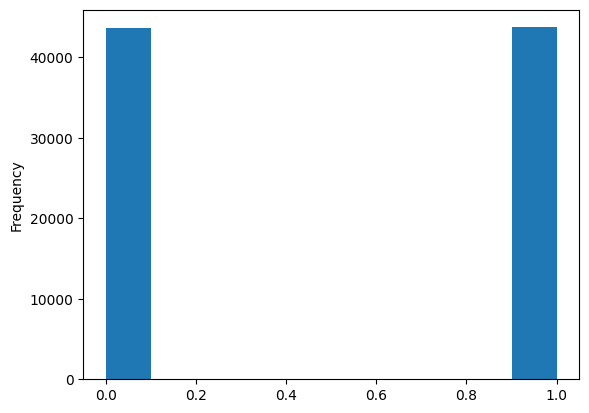

In [13]:
#df2['2-way-label'].plot(kind='hist')
df2['4-way-label'].plot(kind='hist')
print(df2)

In [14]:
#labels = df2['2-way-label'].values
labels.shape, df2.shape, labels_test.shape, df2_test.shape

((87305,), (87305, 1), (24288,), (24288, 1))

In [15]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [16]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  True Statement: "The majority of Austinites rent" the places they live.| Tweet: Hello Austinites! I am looking for someone to go on camera for a story. Anyone unable to afford Austin's rising rent prices and thinking about moving out of town/state? @SpectrumNews1TX #austin 

If you're interested in being interviewed, email me at jamil.donith@charter.com
Tokenized:  ['true', 'statement', ':', '"', 'the', 'majority', 'of', 'austin', '##ites', 'rent', '"', 'the', 'places', 'they', 'live', '.', '|', 't', '##wee', '##t', ':', 'hello', 'austin', '##ites', '!', 'i', 'am', 'looking', 'for', 'someone', 'to', 'go', 'on', 'camera', 'for', 'a', 'story', '.', 'anyone', 'unable', 'to', 'afford', 'austin', "'", 's', 'rising', 'rent', 'prices', 'and', 'thinking', 'about', 'moving', 'out', 'of', 'town', '/', 'state', '?', '@', 'spectrum', '##ne', '##ws', '##1', '##t', '##x', '#', 'austin', 'if', 'you', "'", 're', 'interested', 'in', 'being', 'interviewed', ',', 'email', 'me', 'at', 'jam', '

In [17]:
#max_len = 0
from tqdm import tqdm

# For every sentence...
#for sent in tqdm(sentences):

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
#    max_len = max(max_len, len(input_ids))

#print('Max sentence length: ', max_len)

In [18]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

input_ids_test = []
attention_masks_test = []

MAX_SENTENCE_LENGTH = 410

# For every sentence...
for sent in tqdm(sentences):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SENTENCE_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

for sent in tqdm(sentences_test):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_SENTENCE_LENGTH,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_test.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict['attention_mask'])

  0%|                                                 | 0/87305 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/nbuser/demo/bert/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██

In [19]:
import torch
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels_test = torch.tensor(labels_test)

In [20]:

index = 10
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[index])
print('Token IDs:', input_ids[index])
print ('Labels:', labels[index])

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences_test[index])
print('Token IDs:', input_ids_test[index])
print ('Labels:', labels_test[index])

Original:  True Statement: Republicans have shown themselves willing to cut millions off their health insurance and eliminate preexisting condition protections for millions more, even in the middle of this public health crisis."| Tweet: @RahLeafColorado @lananothony @LAboderin @ToadFur @LPFeinberg @SenSanders The VA is the government running health services we're talking about a bill to have the government run health insurance there's a pretty big difference there. And Medicaid and the VA would be better if they were properly funded, but Republicans like to cut those programs.
Token IDs: tensor([  101,  2995,  4861,  1024, 10643,  2031,  3491,  3209,  5627,  2000,
         3013,  8817,  2125,  2037,  2740,  5427,  1998, 11027,  3653, 10288,
         2923,  2075,  4650, 28548,  2005,  8817,  2062,  1010,  2130,  1999,
         1996,  2690,  1997,  2023,  2270,  2740,  5325,  1012,  1000,  1064,
         1056, 28394,  2102,  1024,  1030, 10958,  7317,  5243, 11329, 12898,
        12173, 

In [21]:
input_ids.shape, attention_masks.shape, labels.shape

(torch.Size([87305, 410]), torch.Size([87305, 410]), torch.Size([87305]))

In [22]:
input_ids_test.shape, attention_masks_test.shape, labels_test.shape

(torch.Size([24288, 410]), torch.Size([24288, 410]), torch.Size([24288]))

In [23]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(len(dataset))
val_size = int(len(dataset_test))

# Divide the dataset by randomly selecting samples.
#train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset = dataset
val_dataset = dataset_test

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

87,305 training samples
24,288 validation samples


In [24]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 128

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = RandomSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.,
        )

In [25]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda(2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [27]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/home/nbuser/demo/bert/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [28]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 1 as there was incredibly negligiable effects after just 1 epoch.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [29]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [30]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [31]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda:2")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(2))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 4 GPU(s) available.
We will use the GPU: NVIDIA RTX 6000 Ada Generation


In [32]:
SAVE_DIR = 'Truthseeker2023/checkpoints/checkpoint_with_maxlength_410'

In [33]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()
    train_loss = 0
    total_fake_examples = 0
    total_true_examples = 0
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        #if step > 2000:
        if step > 10000:
            break
        # Progress update every 40 batches.
        #if step % 40 == 0 and not step == 0:
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}. Training loss. {:} Num fake examples {:} Num true examples {:}'.format(step, len(train_dataloader), elapsed, train_loss,total_fake_examples, total_true_examples ))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(torch.int64).to(device)
        total_fake_examples += (b_labels == 1).sum().item()
        total_true_examples += (b_labels == 0).sum().item()
        #print (f"{b_labels.shape=}")
        b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
        #print (b_input_ids.shape, b_labels.shape, b_input_mask.shape, b_labels_one_hot.shape, b_labels_one_hot.dtype)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels_one_hot)
        loss = output.loss
        logits = output.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        train_loss= loss.item()
        total_train_loss += train_loss

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
        #print (f"Training loss", loss.item())

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    
    for step, batch in enumerate(validation_dataloader):
        #if step > 2000:
        #    break
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(torch.int64).to(device)
        b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            
            output = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels_one_hot)
            loss = output.loss
            logits = output.logits


            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    #Save model checkpoint
    model.save_pretrained(SAVE_DIR)

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch   100  of    683.    Elapsed: 0:02:22. Training loss. 0.19410964846611023 Num fake examples 6422 Num true examples 6378
  Batch   200  of    683.    Elapsed: 0:04:46. Training loss. 0.19548991322517395 Num fake examples 12881 Num true examples 12719
  Batch   300  of    683.    Elapsed: 0:07:11. Training loss. 0.24058960378170013 Num fake examples 19214 Num true examples 19186
  Batch   400  of    683.    Elapsed: 0:09:35. Training loss. 0.08565721660852432 Num fake examples 25642 Num true examples 25558
  Batch   500  of    683.    Elapsed: 0:12:00. Training loss. 0.08568742126226425 Num fake examples 32067 Num true examples 31933
  Batch   600  of    683.    Elapsed: 0:14:24. Training loss. 0.13763076066970825 Num fake examples 38450 Num true examples 38350

  Average training loss: 0.16
  Training epcoh took: 0:16:23

Running Validation...
  Accuracy: 0.97
  Validation Loss: 0.13
  Validation took: 0:01:54

Training complete!
Total 

## Inference

In [34]:
def encode(sentence):
    return tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 410,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

SENTENCE_INDEX = 5000
encoded_dict = encode(sentences[SENTENCE_INDEX])
input_id = encoded_dict['input_ids']
attention_mask = encoded_dict['attention_mask']
print (input_id.shape)
model.eval()
output = model(
            #input_id,
            input_id.cuda(2),
            token_type_ids=None, 
            #attention_mask=attention_mask, return_dict=True)
            attention_mask=attention_mask.cuda(2), return_dict=True)
print (output)
print (labels[SENTENCE_INDEX])

torch.Size([1, 410])
SequenceClassifierOutput(loss=None, logits=tensor([[-3.5370,  3.5173]], device='cuda:2', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor(1)


/home/nbuser/demo/bert/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


## Using validation dataset

In [35]:
val_dataset[0][1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
SENTENCE_INDEX = 5000
model.eval()
#print (torch.unsqueeze(val_dataset[SENTENCE_INDEX][0], dim=0).shape)
print (torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(2), dim=0).shape)
output = model(torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(2), dim=0),
#output = model(torch.unsqueeze(val_dataset[SENTENCE_INDEX][0], dim=0),
            token_type_ids=None, 
            #attention_mask=torch.unsqueeze(val_dataset[SENTENCE_INDEX][0],dim=0), return_dict=True)
            attention_mask=torch.unsqueeze(val_dataset[SENTENCE_INDEX][0].cuda(2),dim=0), return_dict=True)
print (output)
print (labels[SENTENCE_INDEX])

torch.Size([1, 410])
SequenceClassifierOutput(loss=None, logits=tensor([[-0.4296,  0.4381]], device='cuda:2', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor(1)


In [37]:
all_true_labels = []
all_predicted_labels = []
for step, batch in enumerate(validation_dataloader):
    #if step > 5:
    #    break
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(torch.int64).to(device)
    b_labels_one_hot = torch.nn.functional.one_hot(b_labels, num_classes=2).float()
    
    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        output = model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels_one_hot)
        loss = output.loss
        logits = output.logits
        #print (logits, b_labels)

        # Get predicted class from logits
        predicted_class = torch.argmax(logits, dim=1)
        
        # Append true labels and predicted labels to the lists
        all_true_labels.extend(b_labels.cpu().numpy())  # Move to CPU and convert to numpy
        all_predicted_labels.extend(predicted_class.cpu().numpy())  # Same for predictions

Precision: 0.9691744533281957
Recall: 0.9624067342643964
F1: 0.9657787377009839


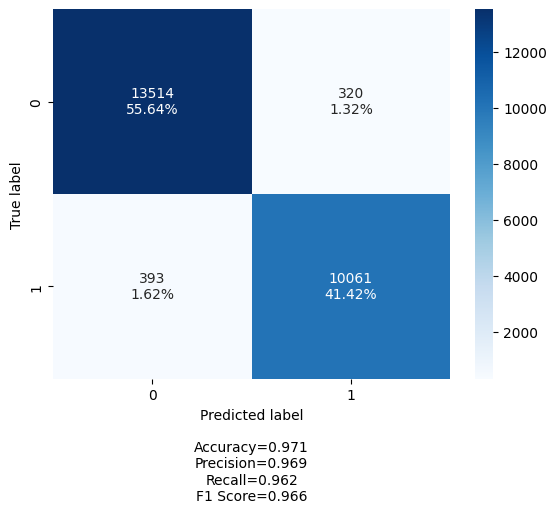

In [38]:
from cf_matrix import make_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
cf = confusion_matrix(all_true_labels, all_predicted_labels)

print("Precision: " + str(precision_score(all_true_labels, all_predicted_labels)))
print("Recall: " + str(recall_score(all_true_labels, all_predicted_labels)))
print("F1: " + str(f1_score(all_true_labels, all_predicted_labels)))

better_cf = make_confusion_matrix(cf, (6,5))
plt.savefig('confusion_matrix.png', format='png')  # Saves the plot as a PNG file
better_cf